In [1]:
#imports
import json
from os import listdir
from os.path import isfile, join
from types import SimpleNamespace
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
class verkiezings_programma:
    def __init__(self, party, orderedList):
        self.party_name = party
        self.ordered_list = orderedList

def object_decoder(obj):
    return verkiezings_programma(obj['party'], obj['orderedList'])

In [3]:
#read json and turn into verkiezing programmas
fileNames = [f for f in listdir('output/') if isfile(join('output/', f))]
print(fileNames)
verkiezings_programmas = []
for fileName in fileNames:
    with open(f'output/{fileName}', encoding="utf8") as jsonFile:
        dictio = json.load(jsonFile)
        vp = object_decoder(dictio)
        verkiezings_programmas.append(vp)

['50Plus.json', 'BIJ1.json', 'CDA.json', 'CU.json', 'D66.json', 'DENK.json', 'FvD.json', 'Groenlinks.json', 'JA21.json', 'PiratenPartij.json', 'PvdA.json', 'PvdD.json', 'PVV.json', 'SGP.json', 'SP.json', 'Volt.json', 'VVD.json']


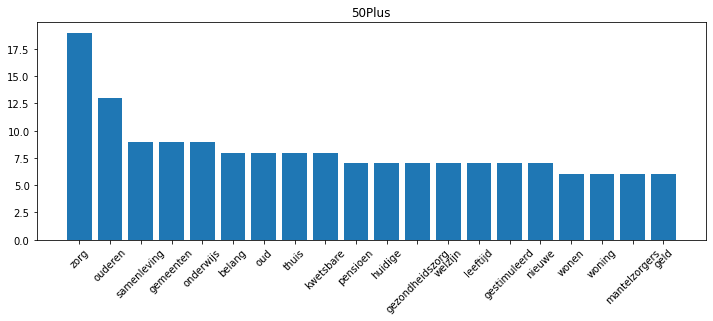

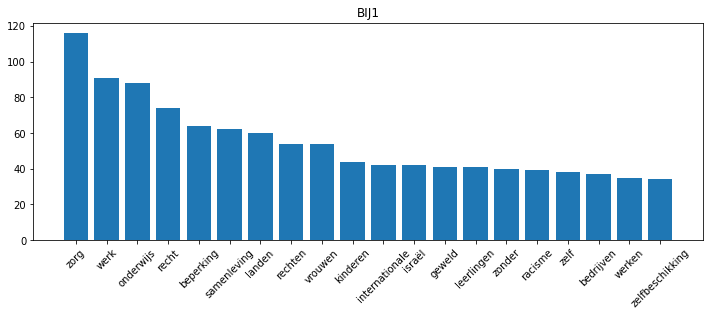

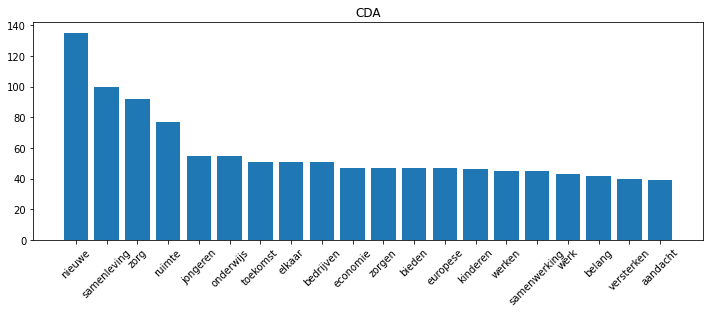

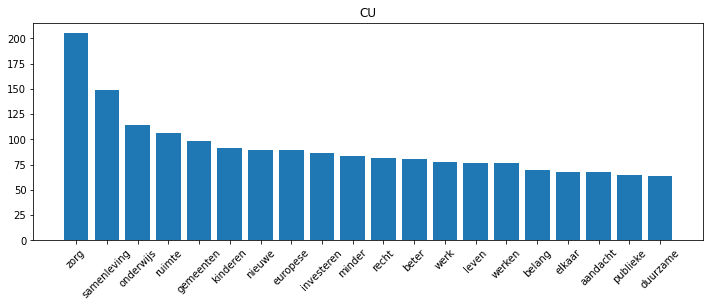

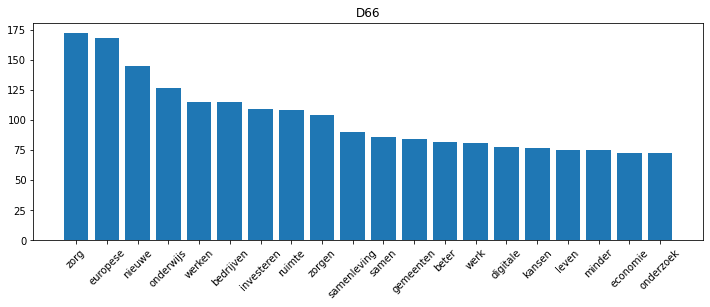

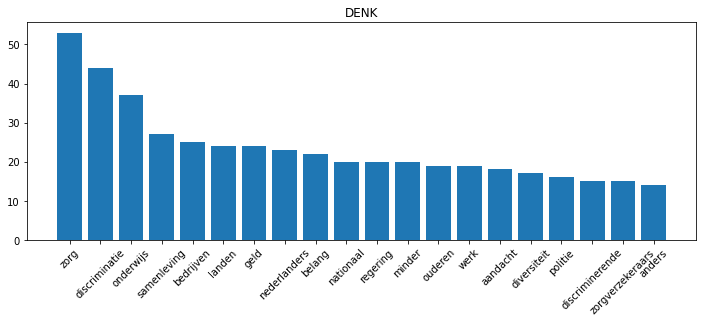

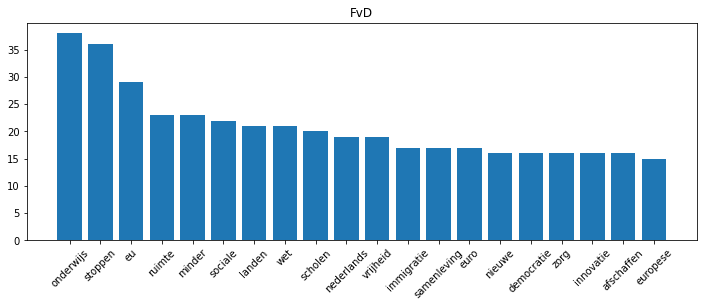

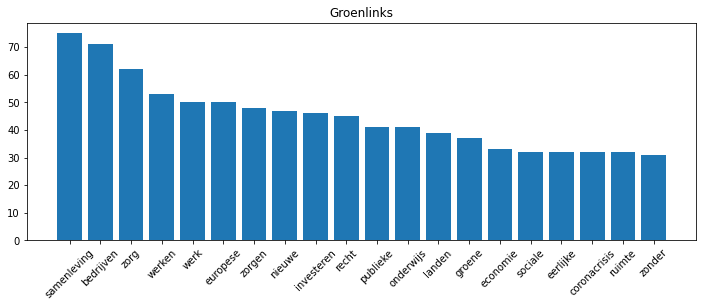

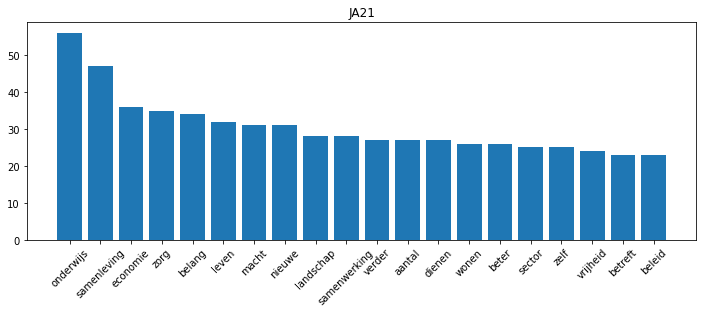

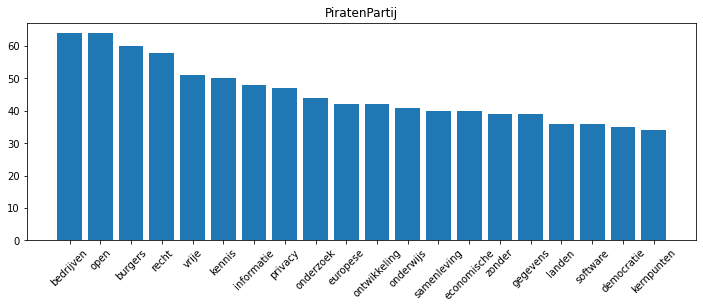

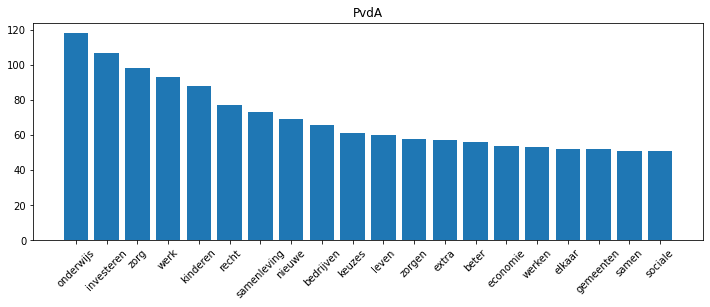

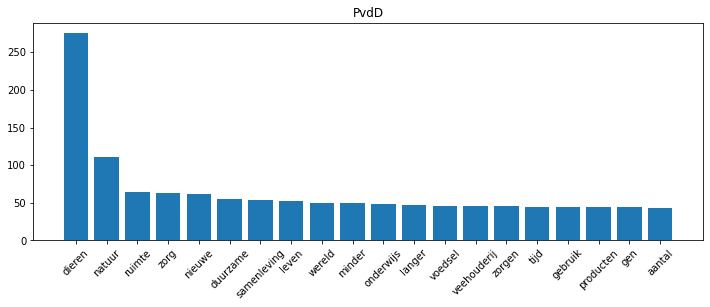

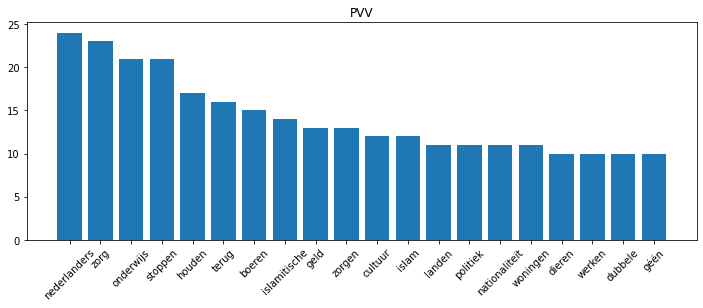

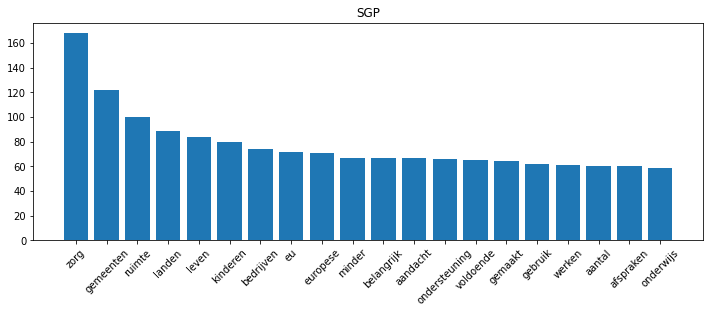

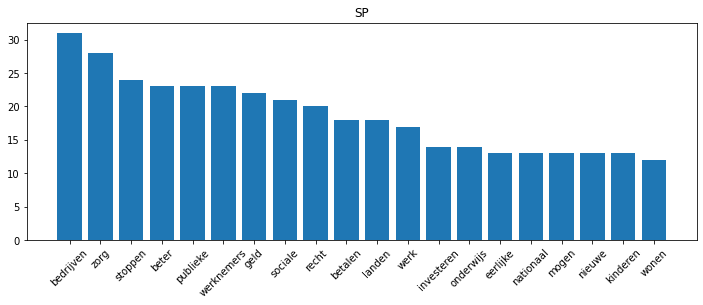

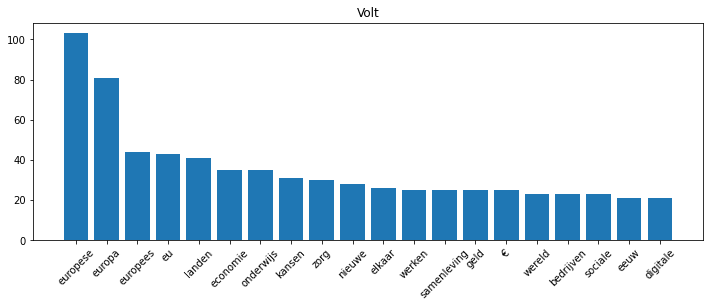

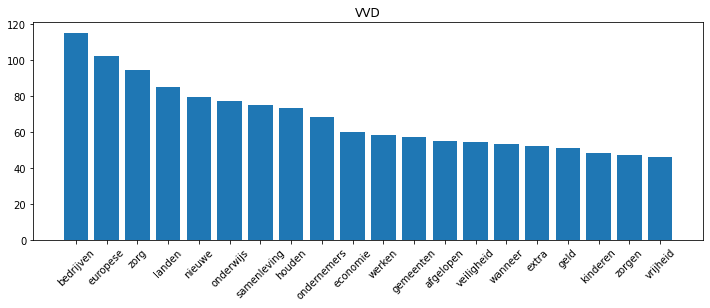

In [11]:
amountOfBars = 20
barWidth = amountOfBars
width = [barWidth * 0.8 for i in range(amountOfBars)]
x_pos = [barWidth/2 + barWidth * i for i in range(amountOfBars)]
for verkiezings_programma in verkiezings_programmas:
    snippet = verkiezings_programma.ordered_list[:amountOfBars]
    words = [s['word'] for s in snippet]
    counts = [s['count'] for s in snippet]
    fig, ax = plt.subplots(figsize=((12/20)*amountOfBars,4))
    ax.set_title(verkiezings_programma.party_name)
    plt.bar(x_pos, counts, width=width)
    plt.xticks(x_pos, words, rotation=45)
    plt.show()
    


In [4]:
def create_voc_and_count():    
    master_vocabulary = []
    master_vocabulary_set = set()
    vocabulary_count = []
    for verkiezings_programma in verkiezings_programmas:
        for word_count in verkiezings_programma.ordered_list:
            if  word_count['word'] not in master_vocabulary_set:
                master_vocabulary_set.add(word_count['word'])
                master_vocabulary.append(word_count['word'])
                vocabulary_count.append(1)
            else:
                index = master_vocabulary.index(word_count['word'])
                vocabulary_count[index] += 1
    print('created vocabulary')
    return master_vocabulary, vocabulary_count

def trim_voc(vocabulary, count, min_amount_of_occurences):
    vocabulary_trimmed = []
    count_trimmed = []
    for index, word in enumerate(vocabulary):
        if not count[index] < min_amount_of_occurences:
            vocabulary_trimmed.append(word)
            count_trimmed.append(count[index])
    return vocabulary_trimmed, count_trimmed

def create_vectors(vocabulary, voc_count):
    vectors = []
    for verkiezings_programma in verkiezings_programmas:
        map_rep = {word_count['word']: word_count['count'] for word_count in verkiezings_programma.ordered_list}
        vector = []
        vectors.append(vector)
        for mv_index, word in enumerate(vocabulary):
            count = map_rep.get(word)
            if count != None:
                n = len(verkiezings_programmas)
                d = voc_count[mv_index]
                score = count * math.log2(n/d)
                vector.append(score)
            else:
                vector.append(0)
    print('created vectors')
    return vectors

def create_sim_matrix(vectors):
    sim_matrix = []
    for verkiezings_programma in verkiezings_programmas:
        row = []
        sim_matrix.append(row)
        for verkiezings_programma in verkiezings_programmas:
            row.append(0)
    for i, vector_i in enumerate(vectors):
        for j, vector_j in enumerate(vectors):
            if i != j:
                sim_score = 1 - spatial.distance.cosine(vector_i, vector_j)
                sim_matrix[i][j] = sim_score
                sim_matrix[j][i] = sim_score
            else:
                sim_matrix[i][j] = 0
    return sim_matrix

def get_sim_matrix():
    mv, vc = create_voc_and_count()
    tmv, tvc = trim_voc(mv, vc, 2)
    vecs = create_vectors(tmv, tvc)
    return create_sim_matrix(vecs)

In [5]:
sim_matrix = get_sim_matrix()
sim_matrix

created vocabulary
created vectors


[[0,
  0.05681396436929387,
  0.07984179548679582,
  0.10969290554793143,
  0.10166226897210906,
  0.0596569538774675,
  0.06391660836421287,
  0.06446253710035521,
  0.07338309717125069,
  0.045593578629254394,
  0.10338892832265556,
  0.05991578580096679,
  0.0351912898803356,
  0.1030524053577676,
  0.03886033627229635,
  0.03341673718717075,
  0.08913875562669848],
 [0.05681396436929387,
  0,
  0.13370265884434263,
  0.19806085069476276,
  0.21736987407720787,
  0.20419932142907216,
  0.10674244765420393,
  0.2248076113401838,
  0.21913237960913368,
  0.13719161601144592,
  0.21208662703950276,
  0.30707754335949766,
  0.0712472379552831,
  0.18793973286494958,
  0.14320802489573103,
  0.22349241867154213,
  0.1549983007301028],
 [0.07984179548679582,
  0.13370265884434263,
  0,
  0.29402821161098114,
  0.2891748507475783,
  0.10203704147604375,
  0.11827858850286654,
  0.191319208349903,
  0.17137538554353382,
  0.13970422462645415,
  0.2576201680872007,
  0.12418360432850839,
  0

In [8]:
df = pd.DataFrame(sim_matrix)
party_names = [verkiezings_programma.party_name for verkiezings_programma in verkiezings_programmas]
df.columns = party_names
df.index = party_names
df

,50Plus,BIJ1,CDA,CU,D66,DENK,FvD,Groenlinks,JA21,PiratenPartij,PvdA,PvdD,PVV,SGP,SP,Volt,VVD
50Plus,0.000000,0.056814,0.079842,0.109693,0.101662,0.059657,0.063917,0.064463,0.073383,0.045594,0.103389,0.059916,0.035191,0.103052,0.038860,0.033417,0.089139
BIJ1,0.056814,0.000000,0.133703,0.198061,0.217370,0.204199,0.106742,0.224808,0.219132,0.137192,0.212087,0.307078,0.071247,0.187940,0.143208,0.223492,0.154998
CDA,0.079842,0.133703,0.000000,0.294028,0.289175,0.102037,0.118279,0.191319,0.171375,0.139704,0.257620,0.124184,0.066250,0.247234,0.094638,0.107620,0.235395
CU,0.109693,0.198061,0.294028,0.000000,0.401833,0.151487,0.181100,0.262513,0.197985,0.162325,0.322740,0.195563,0.088877,0.411420,0.128595,0.191625,0.276150
D66,0.101662,0.217370,0.289175,0.401833,0.000000,0.158808,0.168220,0.293936,0.208882,0.214242,0.339171,0.226610,0.091568,0.324739,0.148588,0.180896,0.318887
DENK,0.059657,0.204199,0.102037,0.151487,0.158808,0.000000,0.090247,0.138088,0.098519,0.075042,0.166328,0.084375,0.068393,0.140654,0.080262,0.066862,0.120674
FvD,0.063917,0.106742,0.118279,0.181100,0.168220,0.090247,0.000000,0.096744,0.245073,0.136686,0.142487,0.087949,0.154584,0.171377,0.075852,0.094717,0.157367
Groenlinks,0.064463,0.224808,0.191319,0.262513,0.293936,0.138088,0.096744,0.000000,0.129529,0.143066,0.307976,0.205571,0.079532,0.199923,0.161425,0.103503,0.194835
JA21,0.073383,0.219132,0.171375,0.197985,0.208882,0.098519,0.245073,0.129529,0.000000,0.115445,0.166607,0.299262,0.118807,0.230790,0.106867,0.256069,0.183841
PiratenPartij,0.045594,0.137192,0.139704,0.162325,0.214242,0.075042,0.136686,0.143066,0.115445,0.000000,0.167849,0.115271,0.048317,0.150794,0.078351,0.089181,0.145460


<AxesSubplot:>

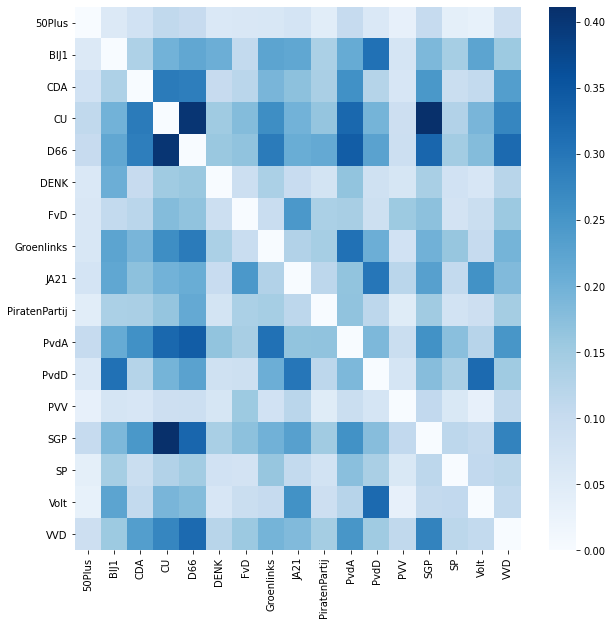

In [9]:
import seaborn as sns 
ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df, xticklabels=True, yticklabels=True, cmap="Blues")


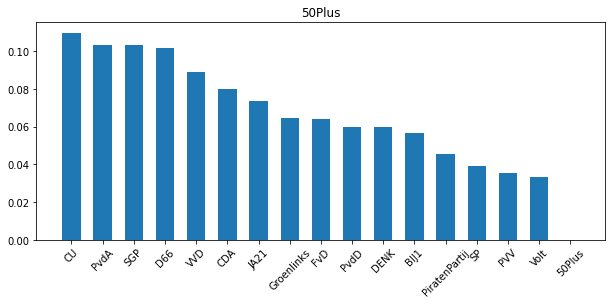

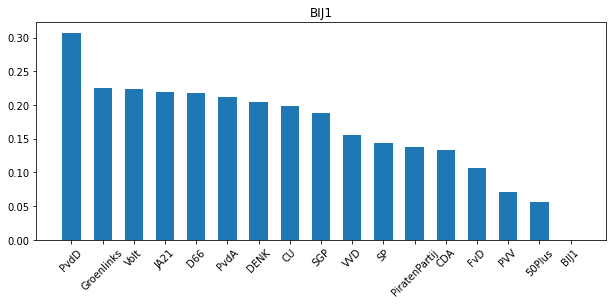

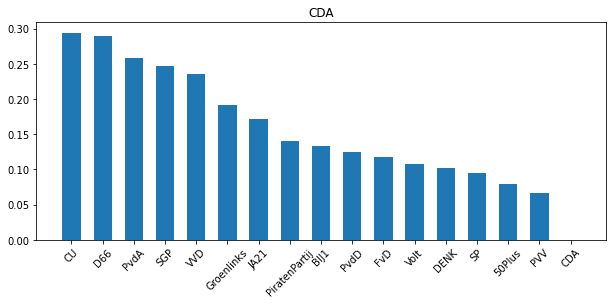

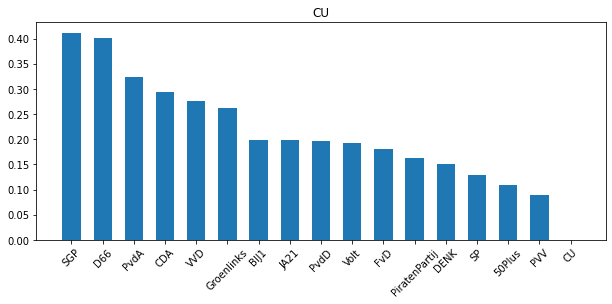

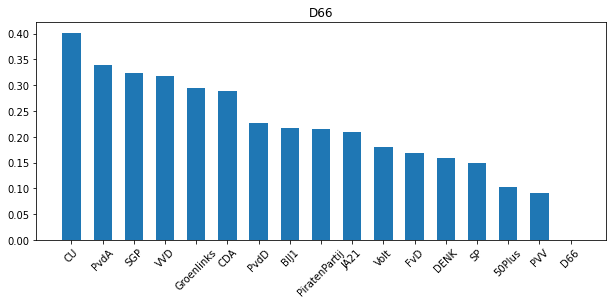

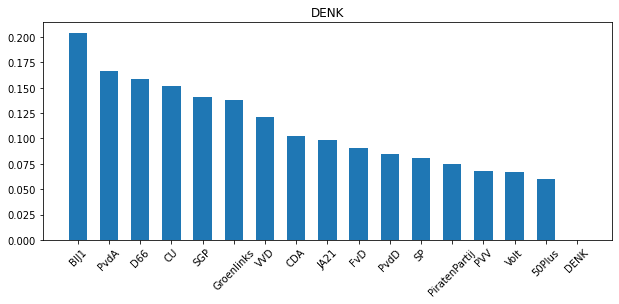

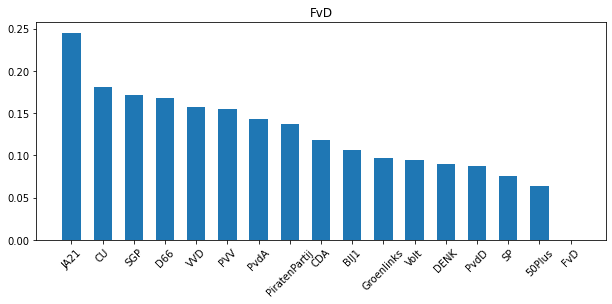

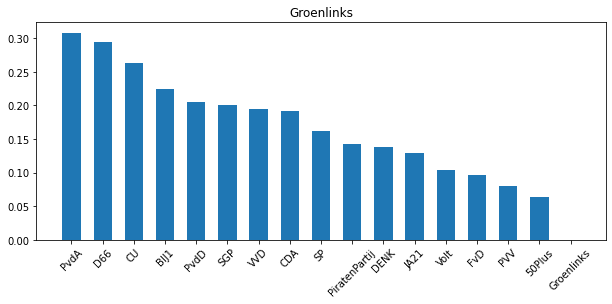

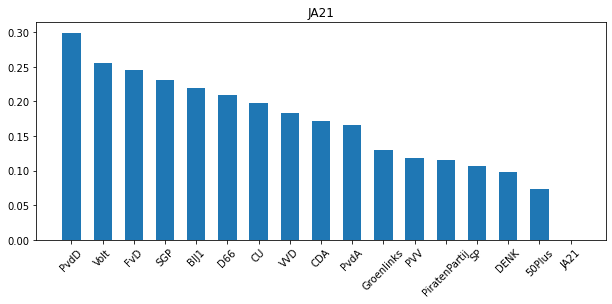

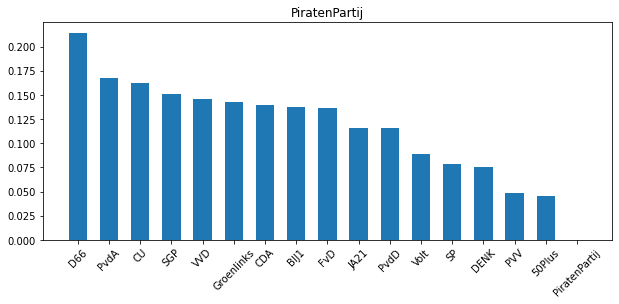

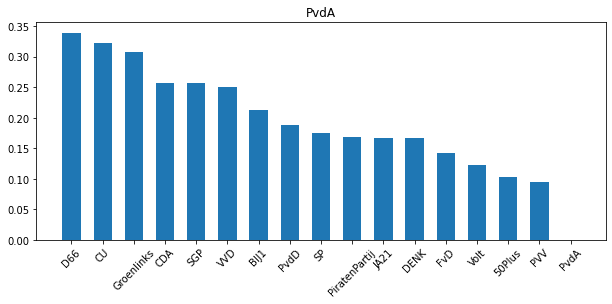

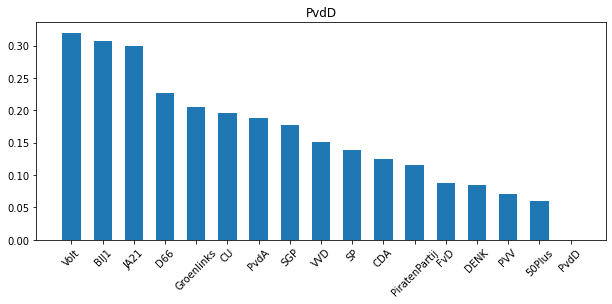

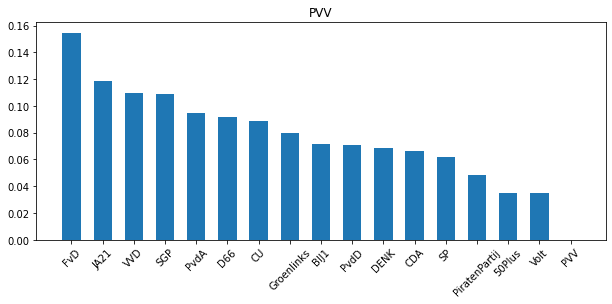

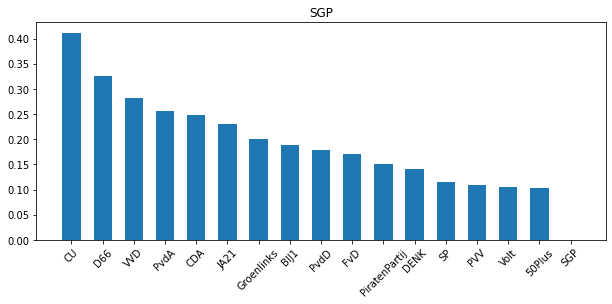

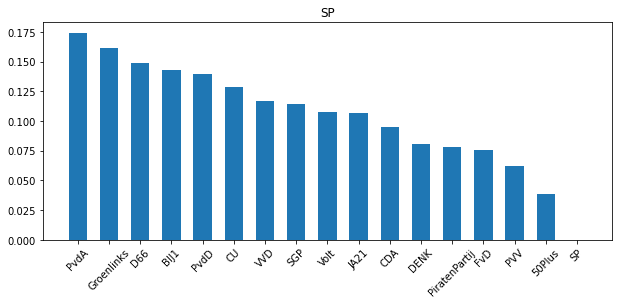

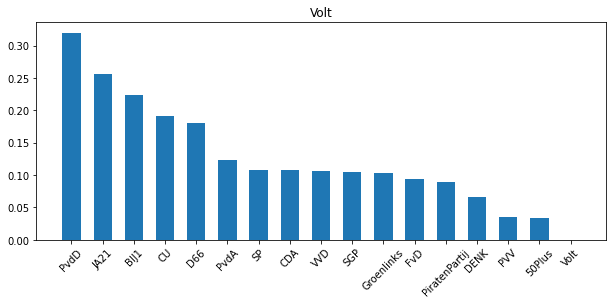

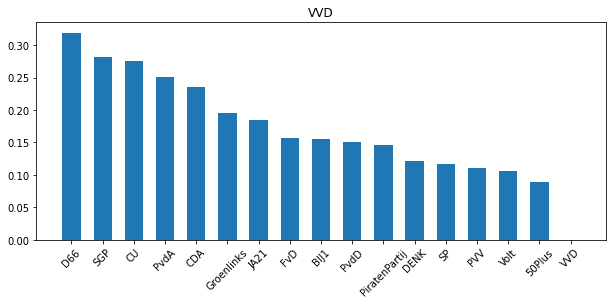

In [10]:
for i, label in enumerate(df):
    ranking = {df.columns[j]: score for j, score in enumerate(df[label])}
    sorted_ranking = sorted(ranking.items(), key=lambda x:x[1], reverse=True)
    scores = [item[1] for item in sorted_ranking]
    names = [item[0] for item in sorted_ranking]
    x_pos_rank = [len(verkiezings_programmas)/2 + len(verkiezings_programmas) * i for i in range(len(verkiezings_programmas))]

    fig, ax = plt.subplots(figsize=((12/20)*len(verkiezings_programmas),4))
    ax.set_title(label)
    plt.bar(x_pos_rank, scores, width=10)
    plt.xticks(x_pos_rank, names, rotation=45)
    plt.show()
